In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
connection = engine.connect()
results = connection.execute("Select * from Station")
columns = [column for column in results.keys()]
columns

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [10]:
results = connection.execute("Select * from measurement")
columns = [column for column in results.keys()]
columns

['id', 'station', 'date', 'prcp', 'tobs']

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_data = session.query(func.max(measurement.date)).first()
most_recent_data

('2017-08-23',)

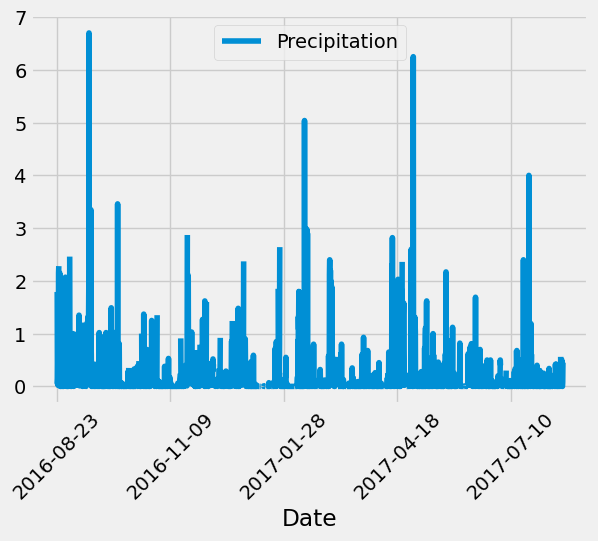

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)
last_year
# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(measurement.date,measurement.prcp).filter(measurement.date >= last_year).all()
last_year_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(last_year_data, columns = ["Date", "Precipitation"])
results_df

# Sort the dataframe by date
results_df = results_df.sort_values("Date")
results_df
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(x = "Date", y = "Precipitation", rot=45)
plt.show()

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.station)).all()
station_count

[(9,)]

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_rows = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
most_active_station = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
most_active_station

(54.0, 85.0, 71.66378066378067)

Text(0.5, 4.183333333333314, 'Temperature')

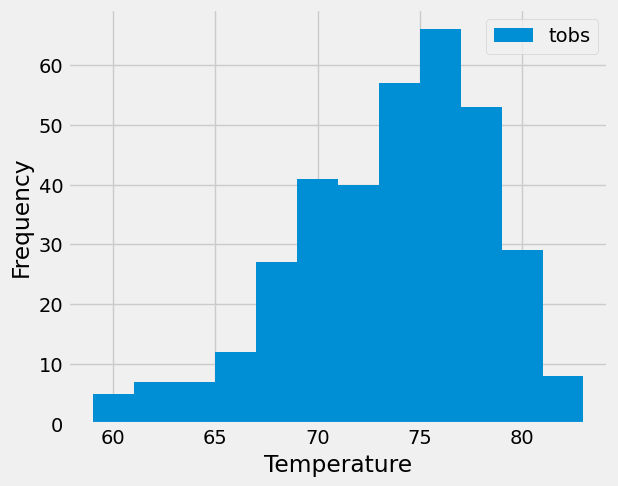

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()